In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('movie_metadata.csv')
data_useful=data[['num_critic_for_reviews', 'duration','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','num_user_for_reviews','gross','imdb_score','title_year','aspect_ratio','cast_total_facebook_likes','facenumber_in_poster']]
data_useful=data_useful.dropna()
data_useful

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_user_for_reviews,gross,imdb_score,title_year,aspect_ratio,cast_total_facebook_likes,facenumber_in_poster
0,723.0,178.0,0.0,1000.0,936.0,855.0,3054.0,760505847.0,7.9,2009.0,1.78,4834,0.0
1,302.0,169.0,563.0,40000.0,5000.0,1000.0,1238.0,309404152.0,7.1,2007.0,2.35,48350,0.0
2,602.0,148.0,0.0,11000.0,393.0,161.0,994.0,200074175.0,6.8,2015.0,2.35,11700,1.0
3,813.0,164.0,22000.0,27000.0,23000.0,23000.0,2701.0,448130642.0,8.5,2012.0,2.35,106759,0.0
5,462.0,132.0,475.0,640.0,632.0,530.0,738.0,73058679.0,6.6,2012.0,2.35,1873,1.0
6,392.0,156.0,0.0,24000.0,11000.0,4000.0,1902.0,336530303.0,6.2,2007.0,2.35,46055,0.0
7,324.0,100.0,15.0,799.0,553.0,284.0,387.0,200807262.0,7.8,2010.0,1.85,2036,1.0
8,635.0,141.0,0.0,26000.0,21000.0,19000.0,1117.0,458991599.0,7.5,2015.0,2.35,92000,4.0
9,375.0,153.0,282.0,25000.0,11000.0,10000.0,973.0,301956980.0,7.5,2009.0,2.35,58753,3.0
10,673.0,183.0,0.0,15000.0,4000.0,2000.0,3018.0,330249062.0,6.9,2016.0,2.35,24450,0.0


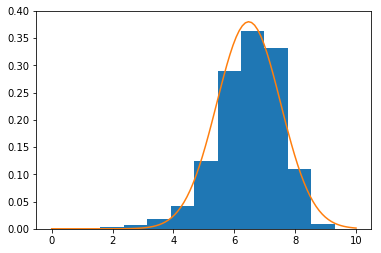

In [6]:
import matplotlib.pyplot as plt 
x=np.array(data_useful.drop(['imdb_score','gross','num_user_for_reviews','num_critic_for_reviews'], axis=1))
y=np.array(data_useful['imdb_score'])
X=np.linspace(0,10,100)
mu=np.mean(y)
sigma=np.std(y)
plt.hist(y,10,density=True)
plt.plot(X,np.exp(-np.multiply(X-[mu]*len(X),X-[mu]*len(X))/(2*sigma**2))/(np.sqrt(2*np.pi*sigma**2)))

Xtrain=x[0:int(len(x)*0.9)]
Xtest=x[len(Xtrain):]
Ytrain=y[0:int(len(y)*0.9)]
Ytest=y[len(Ytrain):]

In [7]:
from sklearn.metrics import mean_squared_error as mse

##Random sampling on training data
Yp=np.random.normal(np.mean(Ytrain),np.std(Ytrain),len(Ytest))
print("MSE:", mse(Ytest,Yp))

MSE: 2.062242069276381


In [8]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(Xtrain, Ytrain)
Yp=reg.predict(Xtest)
print("MSE:", mse(Ytest,Yp))

MSE: 1.0221778514851487


In [9]:
#Ridge
from sklearn.linear_model import Ridge
reg=Ridge()
reg.fit(Xtrain,Ytrain)
Yp=reg.predict(Xtest)
print("MSE:", mse(Ytest,Yp))

MSE: 1.06987576542418


In [10]:
#SVR
from sklearn.svm import SVR
reg=SVR(gamma='auto')
reg.fit(Xtrain,Ytrain)
Yp=reg.predict(Xtest)
err=0
print("MSE:", mse(Ytest,Yp))

MSE: 0.9094778004700204


In [11]:
#Lasso
from sklearn.linear_model import Lasso
reg=Lasso(alpha=1000000)
reg.fit(Xtrain,Ytrain)
Yp=reg.predict(Xtest)
err=0
print("MSE:", mse(Ytest,Yp))

MSE: 0.9984384080218809


In [12]:
#ElasticNet
from sklearn.linear_model import ElasticNet
reg=ElasticNet(alpha=100000)
reg.fit(Xtrain,Ytrain)
Yp=reg.predict(Xtest)
err=0
print("MSE:", mse(Ytest,Yp))

MSE: 0.9984384080218809


In [17]:
##How does dropping a column affect the result?
data_train=data_useful.drop(['imdb_score','gross','num_user_for_reviews','num_critic_for_reviews'], axis=1)
y=np.array(data_useful['imdb_score'])
reg=SVR(gamma='auto')
reg.fit(Xtrain,Ytrain)
Yp=reg.predict(Xtest)
print("complete:")
print("MSE:", mse(Ytest,Yp))
complete = mse(Ytest,Yp)
for col in data_train.columns:
    del reg
    print(col,':')
    x=np.array(data_train.drop(col,axis=1))
    Xtrain=x[0:int(len(x)*0.9)]
    Xtest=x[len(Xtrain):]
    Ytrain=y[0:int(len(y)*0.9)]
    Ytest=y[len(Ytrain):]
    reg=SVR(gamma='auto')
    reg.fit(Xtrain,Ytrain)
    Yp=reg.predict(Xtest)
    print("MSE:", mse(Ytest,Yp))
    print("difference:", np.abs(mse(Ytest,Yp) - complete))


complete:
MSE: 0.9094685352617735
duration :
MSE: 0.909465904384832
difference: 2.630876941522864e-06
director_facebook_likes :
MSE: 0.9097305040093765
difference: 0.00026196874760298083
actor_1_facebook_likes :
MSE: 0.9094711856124589
difference: 2.650350685362568e-06
actor_2_facebook_likes :
MSE: 0.9094399245856077
difference: 2.8610676165774507e-05
actor_3_facebook_likes :
MSE: 0.909455660154548
difference: 1.2875107225474025e-05
title_year :
MSE: 0.9131785411797444
difference: 0.003710005917970882
aspect_ratio :
MSE: 0.9094658564078965
difference: 2.6788538770583514e-06
cast_total_facebook_likes :
MSE: 0.9058299767658272
difference: 0.003638558495946298
facenumber_in_poster :
MSE: 0.9094685352617735
difference: 0.0


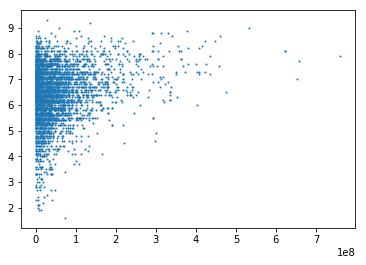

In [14]:
x=np.array(data_useful['gross'])
y=np.array(data_useful['imdb_score'])

plt.plot(x,y,'.',markersize=2)
